In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [5]:
#set up working directory
import io #input-output library
%cd "C:\Users\rishi\OneDrive\Desktop"

C:\Users\rishi\OneDrive\Desktop


In [6]:
#Loading the Dataset
df=pd.read_excel("ip dis2.xls")

## PROBLEM STATEMENT

    The objective is to analyze and understand the relationship between the gross amount charged for patient discharges and the various categories or types of patient admissions. This analysis can provide insights into the cost structure and revenue patterns associated with specific medical conditions or procedures.
  The key components of this problem statement include:
* Patient discharge gross amount: This refers to the total charges or fees billed to patients upon their discharge from the healthcare facility.
* Types of patient admissions: Hospitals or healthcare facilities typically classify patient admissions into different categories based on the medical condition

 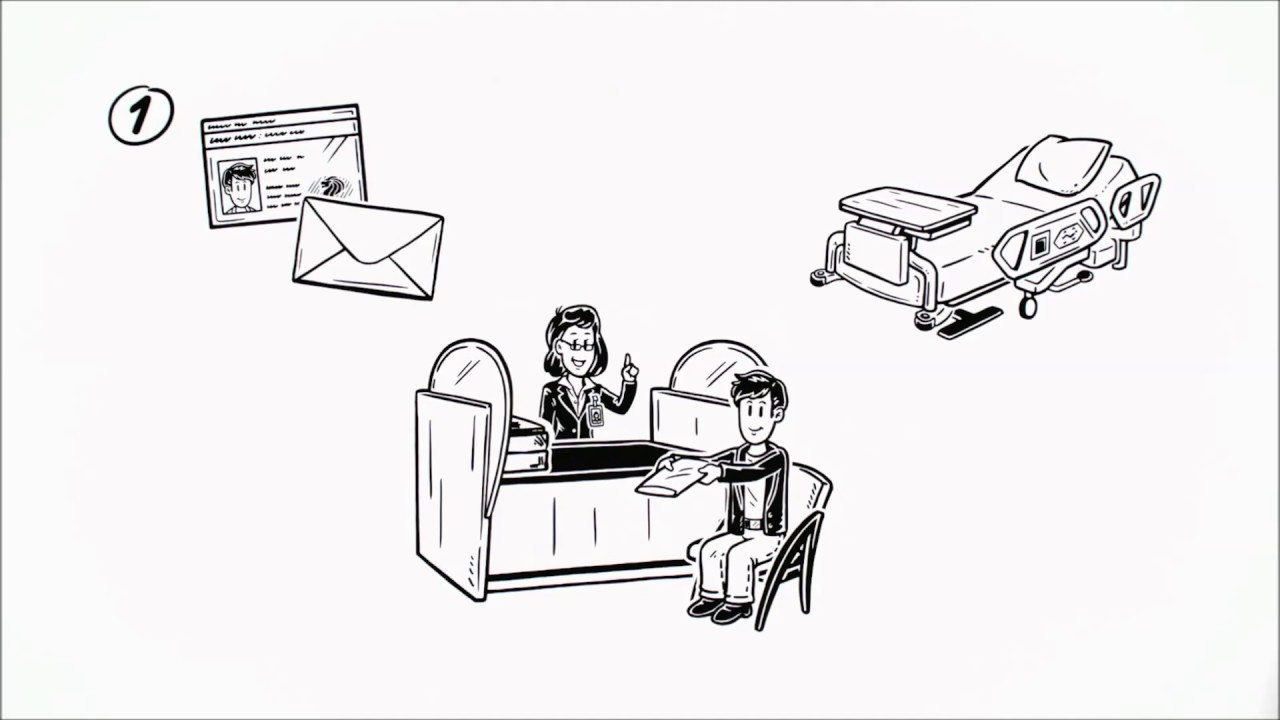

# Exploring the features

In [1]:
# ADMISSIONNO         : Unique number given to patient at the time of Admission 
# DISCHARGENO         : Unique number given for Discharge
# UMRNO               : Unique Medical Record Number
# AGE                 : Age of a Pateint
# GENDER              : Male/Female
# ADMISSIONDT         : Shows the date when the patient is admitted in Hospital       
# DISCHARGEDT         : Shows the date when the patient is discharged from Hospital
# WARDNAME            : The place where patient stayed
# ROOMCD              : Room Code
# BEDCD               : Bed Code
# DUEAMOUNT           : Amount need to be received from patient
# DEPARTMENTNAME      : Based on specialization of treatment category
# ORGANIZATIONNAME    : Paying company name
# PATIENTTYPE         : Based on payment mode
# GROSSAMOUNT         : Total cost for a patient for treatment
# RECEIPTAMOUNT       : Amount received from patient

In [5]:
df.head()

,ADMISSIONNO,DISCHARGENO,UMRNO,AGE,GENDER,ADMISSIONDT,DISCHARGEDT,WARDNAME,ROOMCD,BEDCD,DUEAMOUNT,DEPARTMENTNAME,ORGANIZATIONNAME,PATIENTTYPE,GROSSAMOUNT,RECEIPTAMOUNT
0,IP10000,DIS10041,UMRC3987,83Y(s),Male,2023-06-26 09:04:29,2023-06-26 18:27:48,CHEMO WARD,CW-DELUXE,118,0,MEDICAL ONCOLOGY,General Patients,General,42664,42663.0
1,IP10001,DIS10037,UMRC3819,56Y(s),Female,2023-06-26 09:17:57,2023-06-26 17:26:04,NEW BLOCK,2F-DC,4,0,MEDICAL ONCOLOGY,General Patients,General,29683,29683.0
2,IP10002,DIS10033,UMRC4354,74Y(s),Female,2023-06-26 09:23:17,2023-06-26 16:16:20,CHEMO WARD DOUBLE SHARING A/C,DOUBLE SHARING,109 - B,33096,MEDICAL ONCOLOGY,NUCLEAR FUEL COMPLEX,Corporate,33096,0.0
3,IP10003,DIS10026,UMRC3156,67Y(s),Female,2023-06-26 09:45:02,2023-06-26 13:33:25,NEW BLOCK,2F-DC,5,0,MEDICAL ONCOLOGY,General Patients,General,10553,10553.0
4,IP10004,DIS10048,UMRC3655,51Y(s),Female,2023-06-26 10:14:46,2023-06-27 10:19:29,CHEMO WARD,CW-DELUXE,130,4938,MEDICAL ONCOLOGY,General Patients,General,59938,55000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9019 entries, 0 to 9018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ADMISSIONNO       9019 non-null   object        
 1   DISCHARGENO       9019 non-null   object        
 2   UMRNO             9019 non-null   object        
 3   AGE               9019 non-null   object        
 4   GENDER            9019 non-null   object        
 5   ADMISSIONDT       9019 non-null   datetime64[ns]
 6   DISCHARGEDT       9019 non-null   datetime64[ns]
 7   WARDNAME          9019 non-null   object        
 8   ROOMCD            9019 non-null   object        
 9   BEDCD             9019 non-null   object        
 10  DUEAMOUNT         9019 non-null   int64         
 11  DEPARTMENTNAME    9019 non-null   object        
 12  ORGANIZATIONNAME  9019 non-null   object        
 13  PATIENTTYPE       9019 non-null   object        
 14  GROSSAMOUNT       9019 n

In [7]:
df.describe()

,ADMISSIONDT,DISCHARGEDT,DUEAMOUNT,GROSSAMOUNT,RECEIPTAMOUNT
count,9019,9019,9019.000000,9019.000000,9019.000000
mean,2023-08-10 02:59:30.561481472,2023-08-11 02:24:19.473001472,18422.523007,51147.091695,28678.991982
min,2022-12-22 20:20:14,2023-01-01 12:03:09,0.000000,0.000000,0.000000
25%,2023-04-24 11:45:40.500000,2023-04-25 16:32:41,0.000000,18678.000000,1436.000000
50%,2023-08-11 10:27:55,2023-08-12 14:34:05,0.000000,29448.000000,15000.000000
75%,2023-11-24 12:44:01.500000,2023-11-25 16:02:38.500000,21508.500000,53551.500000,31061.500000
max,2024-03-13 09:48:21,2024-03-13 14:57:05,617649.000000,961402.000000,961400.000000
std,NaN,NaN,43315.916707,70470.937893,54449.608183


In [8]:
df.dtypes

ADMISSIONNO                 object
DISCHARGENO                 object
UMRNO                       object
AGE                         object
GENDER                      object
ADMISSIONDT         datetime64[ns]
DISCHARGEDT         datetime64[ns]
WARDNAME                    object
ROOMCD                      object
BEDCD                       object
DUEAMOUNT                    int64
DEPARTMENTNAME              object
ORGANIZATIONNAME            object
PATIENTTYPE                 object
GROSSAMOUNT                  int64
RECEIPTAMOUNT              float64
dtype: object

In [9]:
df['num_days']=(df['DISCHARGEDT']-df['ADMISSIONDT']).dt.days

In [10]:
df=df.drop(['ADMISSIONDT','DISCHARGEDT'],axis=1)

In [11]:
df.AGE=df.AGE.str.replace("Y(s)","")

In [12]:
df.AGE=pd.to_numeric(df.AGE,errors="coerce")

# EDA

<Axes: ylabel='count'>

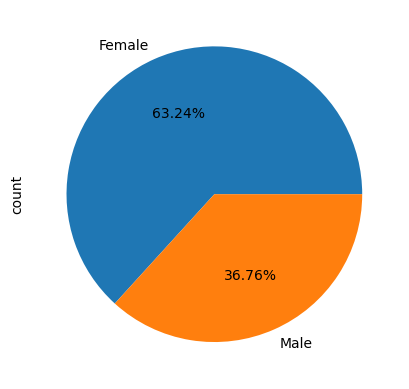

In [13]:
df['GENDER'].value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: xlabel='num_days'>

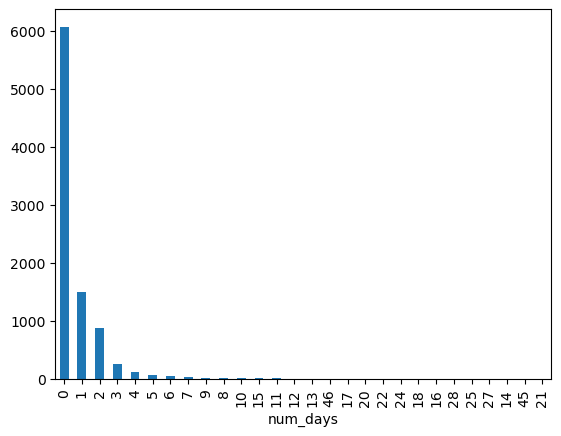

In [14]:
df['num_days'].value_counts().plot(kind="bar")

<Axes: xlabel='DEPARTMENTNAME'>

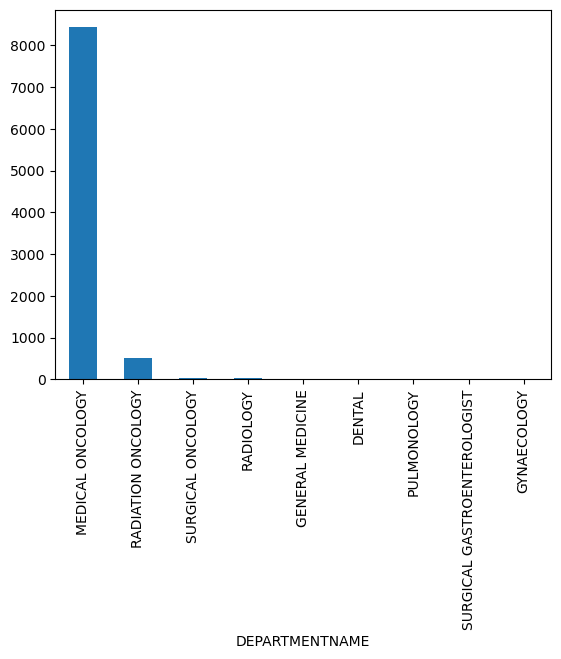

In [15]:
df['DEPARTMENTNAME'].value_counts().plot(kind="bar")

<Axes: >

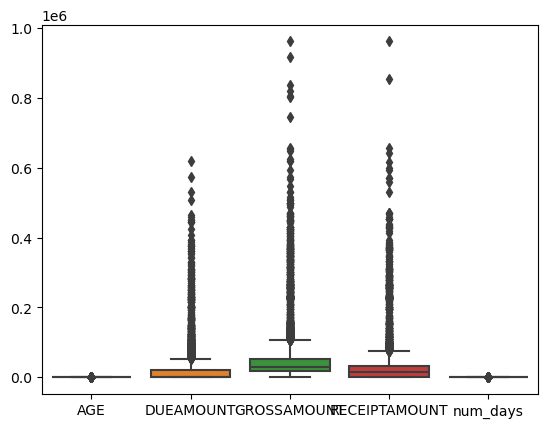

In [16]:
sns.boxplot(df)

<Axes: >

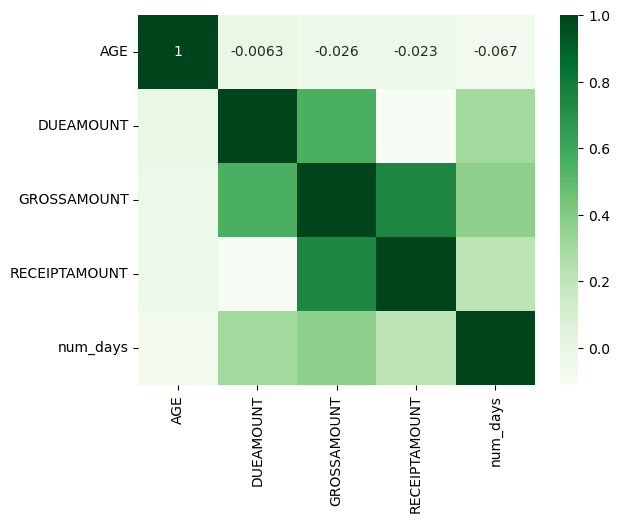

In [17]:
sns.heatmap(df[['AGE','DUEAMOUNT','GROSSAMOUNT','RECEIPTAMOUNT','num_days']].corr(),annot=True,cmap="Greens")

# Data Preprocessing

In [18]:
df.isnull().sum()

ADMISSIONNO         0
DISCHARGENO         0
UMRNO               0
AGE                 0
GENDER              0
WARDNAME            0
ROOMCD              0
BEDCD               0
DUEAMOUNT           0
DEPARTMENTNAME      0
ORGANIZATIONNAME    0
PATIENTTYPE         0
GROSSAMOUNT         0
RECEIPTAMOUNT       0
num_days            0
dtype: int64

##### There are NoNulls from this dataset 

In [19]:
df=df.drop(['ADMISSIONNO','DISCHARGENO','UMRNO'],axis=1)

In [20]:
df.head()

,AGE,GENDER,WARDNAME,ROOMCD,BEDCD,DUEAMOUNT,DEPARTMENTNAME,ORGANIZATIONNAME,PATIENTTYPE,GROSSAMOUNT,RECEIPTAMOUNT,num_days
0,83,Male,CHEMO WARD,CW-DELUXE,118,0,MEDICAL ONCOLOGY,General Patients,General,42664,42663.0,0
1,56,Female,NEW BLOCK,2F-DC,4,0,MEDICAL ONCOLOGY,General Patients,General,29683,29683.0,0
2,74,Female,CHEMO WARD DOUBLE SHARING A/C,DOUBLE SHARING,109 - B,33096,MEDICAL ONCOLOGY,NUCLEAR FUEL COMPLEX,Corporate,33096,0.0,0
3,67,Female,NEW BLOCK,2F-DC,5,0,MEDICAL ONCOLOGY,General Patients,General,10553,10553.0,0
4,51,Female,CHEMO WARD,CW-DELUXE,130,4938,MEDICAL ONCOLOGY,General Patients,General,59938,55000.0,1


# Hypothesis Testing

In [21]:
from scipy.stats import f_oneway

In [22]:
df.GROSSAMOUNT.groupby(df.PATIENTTYPE).mean()

PATIENTTYPE
Corporate    42862.744088
General      48886.937989
Insurance    59494.868543
Name: GROSSAMOUNT, dtype: float64

In [23]:
#Split Data
cop=df[df.PATIENTTYPE=="Corporate"]
gen=df[df.PATIENTTYPE=='General']
ins=df[df.PATIENTTYPE=='Insurance']

In [24]:
f_oneway(cop.GROSSAMOUNT,gen.GROSSAMOUNT,ins.GROSSAMOUNT)
# Since pvalue=2.158917476679484e-13 is less than 0.05,Reject Null

F_onewayResult(statistic=29.258539651461348, pvalue=2.158917476679484e-13)

In [25]:
from scipy.stats import chi2_contingency

In [26]:
chi2_contingency(pd.crosstab(df.DEPARTMENTNAME,df.PATIENTTYPE))
# since pvalue=9.294708745220098e-06 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=52.44135886609811, pvalue=9.294708745220098e-06, dof=16, expected_freq=array([[5.25113649e-01, 2.32442621e+00, 1.15046014e+00],
       [1.05022730e+00, 4.64885242e+00, 2.30092028e+00],
       [1.31278412e-01, 5.81106553e-01, 2.87615035e-01],
       [1.10759596e+03, 4.90279599e+03, 2.42660805e+03],
       [2.62556824e-01, 1.16221311e+00, 5.75230070e-01],
       [6.59017629e+01, 2.91715490e+02, 1.44382748e+02],
       [3.15068189e+00, 1.39465573e+01, 6.90276084e+00],
       [1.31278412e-01, 5.81106553e-01, 2.87615035e-01],
       [5.25113649e+00, 2.32442621e+01, 1.15046014e+01]]))

In [33]:
chi2_contingency(pd.crosstab(df.WARDNAME,df.DEPARTMENTNAME))
# since pvalue=3.1342885734845343e-21 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=189.04152325770585, pvalue=3.1342885734845343e-21, dof=40, expected_freq=array([[1.27153786e+00, 2.54307573e+00, 3.17884466e-01, 2.68199124e+03,
        6.35768932e-01, 1.59578002e+02, 7.62922719e+00, 3.17884466e-01,
        1.27153786e+01],
       [9.72169864e-01, 1.94433973e+00, 2.43042466e-01, 2.05054928e+03,
        4.86084932e-01, 1.22007318e+02, 5.83301918e+00, 2.43042466e-01,
        9.72169864e+00],
       [3.99157335e-03, 7.98314669e-03, 9.97893336e-04, 8.41922608e+00,
        1.99578667e-03, 5.00942455e-01, 2.39494401e-02, 9.97893336e-04,
        3.99157335e-02],
       [4.74553720e-02, 9.49107440e-02, 1.18638430e-02, 1.00095243e+02,
        2.37276860e-02, 5.95564919e+00, 2.84732232e-01, 1.18638430e-02,
        4.74553720e-01],
       [4.61248475e-02, 9.22496951e-02, 1.15312119e-02, 9.72888347e+01,
        2.30624238e-02, 5.78866837e+00, 2.76749085e-01, 1.15312119e-02,
        4.61248475e-01],
       [1.65872048e+00, 3.31744096e+00, 4.14680120

In [32]:
chi2_contingency(pd.crosstab(df.WARDNAME,df.ORGANIZATIONNAME))
# since pvalue=1.58834355289668e-110 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=1150.6007697999057, pvalue=1.58834355289668e-110, dof=265, expected_freq=array([[5.08615146e+00, 8.26499612e+00, 1.84372990e+01, 1.33511476e+01,
        2.22519126e+00, 1.55763388e+01, 2.51128728e+01, 2.30466238e+02,
        2.22519126e+00, 3.49672913e+00, 3.81461359e+00, 4.13249806e+00,
        6.77093913e+01, 1.90730680e+00, 4.45038253e+00, 1.81194146e+01,
        1.66603249e+03, 1.11259563e+01, 4.06892117e+01, 1.23974942e+01,
        2.73380641e+01, 3.17884466e+00, 3.17884466e-01, 1.08080718e+01,
        2.22519126e+01, 5.08615146e+00, 2.22519126e+00, 6.35768932e+00,
        2.68930258e+02, 9.53653398e-01, 6.35768932e-01, 3.49672913e+00,
        3.81461359e+00, 1.49405699e+01, 2.54307573e+01, 4.76826699e+00,
        6.99345825e+00, 1.90730680e+00, 6.35768932e-01, 3.49672913e+00,
        6.03980486e+00, 4.45038253e+00, 2.28876816e+01, 9.53653398e-01,
        3.17884466e-01, 7.31134272e+00, 1.60849540e+02, 2.16161437e+01,
        2.22519126e+00, 3.81461

In [35]:
df.head()

,AGE,GENDER,WARDNAME,ROOMCD,BEDCD,DUEAMOUNT,DEPARTMENTNAME,ORGANIZATIONNAME,PATIENTTYPE,GROSSAMOUNT,RECEIPTAMOUNT,num_days
0,83,Male,CHEMO WARD,CW-DELUXE,118,0,MEDICAL ONCOLOGY,General Patients,General,42664,42663.0,0
1,56,Female,NEW BLOCK,2F-DC,4,0,MEDICAL ONCOLOGY,General Patients,General,29683,29683.0,0
2,74,Female,CHEMO WARD DOUBLE SHARING A/C,DOUBLE SHARING,109 - B,33096,MEDICAL ONCOLOGY,NUCLEAR FUEL COMPLEX,Corporate,33096,0.0,0
3,67,Female,NEW BLOCK,2F-DC,5,0,MEDICAL ONCOLOGY,General Patients,General,10553,10553.0,0
4,51,Female,CHEMO WARD,CW-DELUXE,130,4938,MEDICAL ONCOLOGY,General Patients,General,59938,55000.0,1


In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
ohe=OneHotEncoder()

In [38]:
ohe.fit(df[["GENDER"]])

OneHotEncoder()

In [39]:
df["GENDER"]=ohe.transform(df[["GENDER"]]).toarray()

In [40]:
ohe1=OneHotEncoder()

In [41]:
ohe1.fit(df[["WARDNAME"]])

OneHotEncoder()

In [42]:
df["WARDNAME"]=ohe1.transform(df[["WARDNAME"]]).toarray()

In [43]:
ohe2=OneHotEncoder()

In [44]:
ohe2.fit(df[["ROOMCD"]])

OneHotEncoder()

In [45]:
df["ROOMCD"]=ohe2.transform(df[["ROOMCD"]]).toarray()

In [46]:
ohe3=OneHotEncoder()

In [47]:
ohe3.fit(df[["DEPARTMENTNAME"]])

OneHotEncoder()

In [48]:
df["DEPARTMENTNAME"]=ohe3.transform(df[["DEPARTMENTNAME"]]).toarray()

In [49]:
ohe4=OneHotEncoder()

In [50]:
ohe4.fit(df[["ORGANIZATIONNAME"]])

OneHotEncoder()

In [51]:
df["ORGANIZATIONNAME"]=ohe4.transform(df[["ORGANIZATIONNAME"]]).toarray()

In [52]:
ohe5=OneHotEncoder()

In [53]:
ohe5.fit(df[["PATIENTTYPE"]])

OneHotEncoder()

In [54]:
df["PATIENTTYPE"]=ohe5.transform(df[["PATIENTTYPE"]]).toarray()

In [55]:
ohe6=OneHotEncoder()

In [56]:
ohe6.fit(df[["BEDCD"]])

OneHotEncoder()

In [57]:
df["BEDCD"]=ohe6.transform(df[["BEDCD"]]).toarray()

In [58]:
df.head()

,AGE,GENDER,WARDNAME,ROOMCD,BEDCD,DUEAMOUNT,DEPARTMENTNAME,ORGANIZATIONNAME,PATIENTTYPE,GROSSAMOUNT,RECEIPTAMOUNT,num_days
0,83,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,42664,42663.0,0
1,56,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,29683,29683.0,0
2,74,1.0,0.0,0.0,0.0,33096,0.0,0.0,1.0,33096,0.0,0
3,67,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,10553,10553.0,0
4,51,1.0,1.0,0.0,0.0,4938,0.0,0.0,0.0,59938,55000.0,1


# Division of Data into training and testing set

In [59]:
X= df.drop("GROSSAMOUNT",axis=1)
y= df["GROSSAMOUNT"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

# Model Building

### Model-1 : Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression().fit(X_train,y_train)
lr_score = lr_model.score(X_test,y_test)
lr_tr_pred= lr_model.predict(X_train)
lr_te_pred = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error
lr_tr_acc = round(r2_score(y_train,lr_tr_pred),4)
lr_te_acc = round(r2_score(y_test,lr_te_pred),4)
lr_tr_mse = round(mean_squared_error(y_train,lr_tr_pred),4)
lr_te_mse = round(mean_squared_error(y_test,lr_te_pred),4)
print("Score : ",lr_score)
print("********************************************************")
print("Training r2_score : ",round(lr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(lr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",lr_tr_mse)
print("********************************************************")
print("Testing MSE : ",lr_te_mse)

Score :  0.9663324396870497
********************************************************
Training r2_score :  98.28 %
*****************************************************
Testing r2_score :  96.63 %
*******************************************************
Training MSE :  85646486.162
********************************************************
Testing MSE :  166672098.9117


### Model-2 Lasso

In [60]:
from sklearn.linear_model import Lasso
lasso_model= Lasso().fit(X_train,y_train)
lasso_score = lasso_model.score(X_test,y_test)
lasso_tr_pred= lasso_model.predict(X_train)
lasso_te_pred = lasso_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lasso_tr_acc = round(r2_score(y_train,lasso_tr_pred),4)
lasso_te_acc = round(r2_score(y_test,lasso_te_pred),4)
lasso_tr_mse = round(mean_squared_error(y_train,lasso_tr_pred),4)
lasso_te_mse = round(mean_squared_error(y_test,lasso_te_pred),4)
print("Score : ",lasso_score)
print("*******************************************************")
print("Training r2_score : ",round(lasso_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(lasso_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",lasso_tr_mse)
print("********************************************************")
print("Testing MSE : ",lasso_te_mse)

Score :  0.9663312800984801
*******************************************************
Training r2_score :  98.28 %
*****************************************************
Testing r2_score :  96.63 %
*******************************************************
Training MSE :  85648736.4009
********************************************************
Testing MSE :  166677839.4839


### Model-3 Ridge

In [58]:
from sklearn.linear_model import Ridge
ridge_model= Ridge().fit(X_train,y_train)
ridge_score = ridge_model.score(X_test,y_test)
ridge_tr_pred= ridge_model.predict(X_train)
ridge_te_pred = ridge_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
ridge_tr_acc = round(r2_score(y_train,ridge_tr_pred),4)
ridge_te_acc = round(r2_score(y_test,ridge_te_pred),4)
ridge_tr_mse = round(mean_squared_error(y_train,ridge_tr_pred),4)
ridge_te_mse = round(mean_squared_error(y_test,ridge_te_pred),4)
print("Score : ",ridge_score)
print("*******************************************************")
print("Training r2_score : ",round(ridge_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(ridge_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",ridge_tr_mse)
print("********************************************************")
print("Testing MSE : ",ridge_te_mse)

Score :  0.9663324825283532
*******************************************************
Training r2_score :  98.28 %
*****************************************************
Testing r2_score :  96.63 %
*******************************************************
Training MSE :  85646703.0444
********************************************************
Testing MSE :  166671886.8248


### Model-4 RandomForestRegression

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr_model= RandomForestRegressor().fit(X_train,y_train)
rfr_score = rfr_model.score(X_test,y_test)
rfr_tr_pred= rfr_model.predict(X_train)
rfr_te_pred = rfr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
rfr_tr_acc = round(r2_score(y_train,rfr_tr_pred),4)
rfr_te_acc = round(r2_score(y_test,rfr_te_pred),4)
rfr_tr_mse = round(mean_squared_error(y_train,rfr_tr_pred),4)
rfr_te_mse = round(mean_squared_error(y_test,rfr_te_pred),4)
print("Score : ",rfr_score)
print("*******************************************************")
print("Training r2_score : ",round(rfr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(rfr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",rfr_tr_mse)
print("********************************************************")
print("Testing MSE : ",rfr_te_mse)

Score :  0.9639838805870088
*******************************************************
Training r2_score :  99.67 %
*****************************************************
Testing r2_score :  96.4 %
*******************************************************
Training MSE :  16532576.5235
********************************************************
Testing MSE :  178298699.443


### Model-5 DecisionTreeRegression

In [62]:
from sklearn.tree import DecisionTreeRegressor
dtr_model= DecisionTreeRegressor().fit(X_train,y_train)
dtr_score = dtr_model.score(X_test,y_test)
dtr_tr_pred= dtr_model.predict(X_train)
dtr_te_pred = dtr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
dtr_tr_acc = round(r2_score(y_train,dtr_tr_pred),4)
dtr_te_acc = round(r2_score(y_test,dtr_te_pred),4)
dtr_tr_mse = round(mean_squared_error(y_train,dtr_tr_pred),4)
dtr_te_mse = round(mean_squared_error(y_test,dtr_te_pred),4)
print("Score : ",dtr_score)
print("*******************************************************")
print("Training r2_score : ",round(dtr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(dtr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",dtr_tr_mse)
print("********************************************************")
print("Testing MSE : ",dtr_te_mse)

Score :  0.968329113052799
*******************************************************
Training r2_score :  99.99 %
*****************************************************
Testing r2_score :  96.83 %
*******************************************************
Training MSE :  689311.8225
********************************************************
Testing MSE :  156787517.5041


### Model-6 GradientBoosting

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model= GradientBoostingRegressor().fit(X_train,y_train)
gbr_score = gbr_model.score(X_test,y_test)
gbr_tr_pred= gbr_model.predict(X_train)
gbr_te_pred = gbr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
gbr_tr_acc = round(r2_score(y_train,gbr_tr_pred),4)
gbr_te_acc = round(r2_score(y_test,gbr_te_pred),4)
gbr_tr_mse = round(mean_squared_error(y_train,gbr_tr_pred),4)
gbr_te_mse = round(mean_squared_error(y_test,gbr_te_pred),4)
print("Score : ",gbr_score)
print("*****************************************************")
print("Training r2_score : ",round(gbr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(gbr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",gbr_tr_mse)
print("********************************************************")
print("Testing MSE : ",gbr_te_mse)

Score :  0.9698732365139957
*****************************************************
Training r2_score :  98.99 %
*****************************************************
Testing r2_score :  96.99 %
*******************************************************
Training MSE :  50322933.4799
********************************************************
Testing MSE :  149143295.7112


In [64]:
Models = ["Linear Regression","Lasso","Ridge","DecisionTree Regressor","RandomForest Regressor","GradientBoosting Regressor"]
Accuracy = [lr_te_acc,lasso_te_acc,ridge_te_acc,dtr_te_acc,rfr_te_acc,gbr_te_acc]

<Axes: >

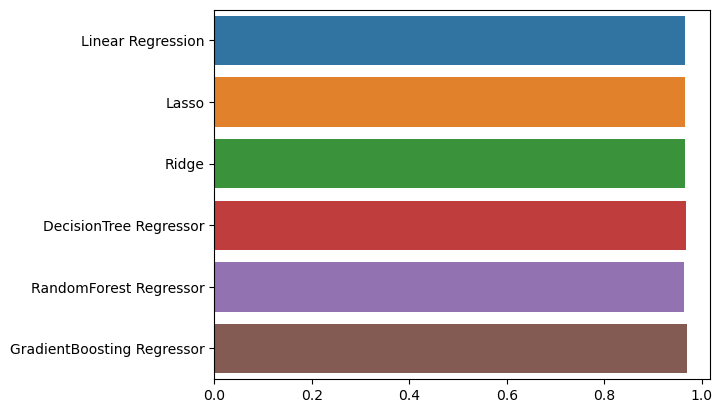

In [65]:
sns.barplot(x=Accuracy,y=Models)

In [66]:
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
lss=Lasso()
rid=Ridge()
lr=LinearRegression()
gbr=GradientBoostingRegressor()

In [67]:
model=[rfr,dtr,lss,rid,lr,gbr]

In [68]:
for i in model:
    print(i)
    i.fit(X_train,y_train)
    s=i.score(X_test,y_test)
    print(s)

RandomForestRegressor()
0.9657222026851751
DecisionTreeRegressor()
0.9456363897421929
Lasso()
0.9663312800984801
Ridge()
0.9663324825283532
LinearRegression()
0.9663324396870497
GradientBoostingRegressor()
0.9698722999770246


In [69]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold

In [70]:
gb_boost=GradientBoostingRegressor()

In [71]:
kf=KFold()

In [72]:
score=cross_val_score(gb_boost,X,y,cv=kf)

In [73]:
score.mean()

0.9714682080890219

#### GridSearchCV using RandomForest Regressor

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
rfr_model1=RandomForestRegressor()

In [76]:
d={'n_estimators': [50,100,150,200],
 'criterion': ["absolute_error", "squared_error"],
 'max_depth': [8,9,10,11]}

In [77]:
gscv=GridSearchCV(rfr_model1,param_grid=d,cv=10,n_jobs=-1)

In [ ]:
gscv.fit(X,y)

In [ ]:
gscv.cv_results_

In [ ]:
gscv.best_score_

In [ ]:
gscv.best_params_

## CONCLUSION

     From above algorithms we found that RandomForestRegression gives the best score of 96.39. By this the hospital can predict for future price for providing service and they can also get a knowledge of either the prices need to be increased or keep constant according to number of admitted cases for each treatment.